# Gradient methods (FORM, Cobyla)

### Estimation of failure probability due to wave overtopping

In this example, we will demonstrate the application of the gradient-based reliability methods (`form` and `cobyla_reliability`) to estimate the probability of failure of a levee due to wave overtopping. 

### Define model

First, we import the necessary classes:

In [7]:
from probabilistic_library import ReliabilityProject, DistributionType, ReliabilityMethod

We consider the following limit state function:

$Z = q_{crit} - q_{o}$

where: <br>

* $q_{crit}$ is the critical overtopping discharge (m3/s/m) <br>
* $q_{o}$ is the occuring wave overtopping discharge (m3/s/m) <br>

The wave overtopping discharche $q_{o}$ is derived in this example using simplified equations from [*Technical Report Wave Run-up and Wave Overtopping at Dikes*, Technical Advisory Committee on Flood Defence, The Netherlands, Delft, May 2002.]. The wave overtopping depends on:

* local water level $h$ (m) <br>
* significant wave height $H_{m0}$ (m) <br>
* spectral wave period $T_{m-1,0}$ (s) <br>
* wave direction with respect to North <br>
* dike normal with respect to North <br>
* crest height $y_{crest}$ (m) <br>

In [8]:
from utils.models import z_func_overtopping

To perform a reliability analysis, we create a reliability project and specify the limit state function (model):

In [9]:
project = ReliabilityProject()
project.model = z_func_overtopping

project.model.print()

Model z_func_overtopping:
Input parameters:
  h
  hm0
  tm10
  wave_direction
  dike_normal
  y_crest
  q_crit
Output parameters:
  Z


We assume the following distributions for the parameters present in the limit state function:

In [10]:
project.variables["h"].distribution = DistributionType.log_normal
project.variables["h"].mean = 1.5
project.variables["h"].deviation = 0.05

project.variables["hm0"].distribution = DistributionType.log_normal
project.variables["hm0"].mean = 1.5
project.variables["hm0"].deviation = 0.25

project.variables["tm10"].distribution = DistributionType.log_normal
project.variables["tm10"].mean = 3
project.variables["tm10"].deviation = 0.5

project.variables["wave_direction"].distribution = DistributionType.deterministic
project.variables["wave_direction"].mean = 0.0

project.variables["dike_normal"].distribution = DistributionType.deterministic
project.variables["dike_normal"].mean = 0.0

project.variables["y_crest"].distribution = DistributionType.deterministic
project.variables["y_crest"].mean = 6.0

project.variables["q_crit"].distribution = DistributionType.log_normal
project.variables["q_crit"].mean = 0.001
project.variables["q_crit"].deviation = 0.01

### Perform reliability calculations with FORM

We start with the reliability method `form`. The reliability analysis is executed using `project.run()`, and the results are accessed from `project.design_point`.

Reliability (FORM)
 Reliability index = 1.27
 Probability of failure = 0.1021
 Convergence = 0.002751 (converged)
 Model runs = 40
Alpha values:
 h: alpha = -0.03435, x = 1.501
 hm0: alpha = -0.3222, x = 1.583
 tm10: alpha = -0.6338, x = 3.381
 wave_direction: alpha = 0, x = 0
 dike_normal: alpha = 0, x = 0
 y_crest: alpha = 0, x = 6
 q_crit: alpha = 0.7024, x = 1.465e-05



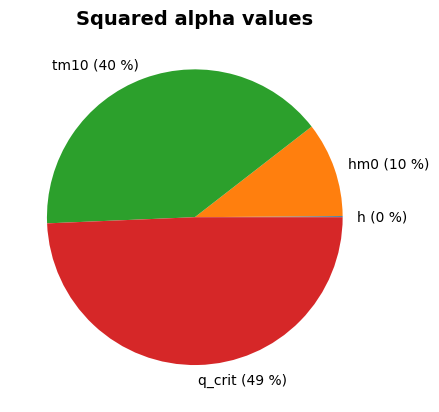

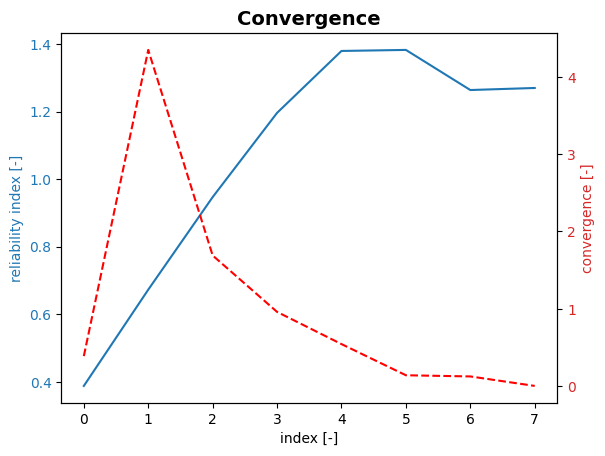

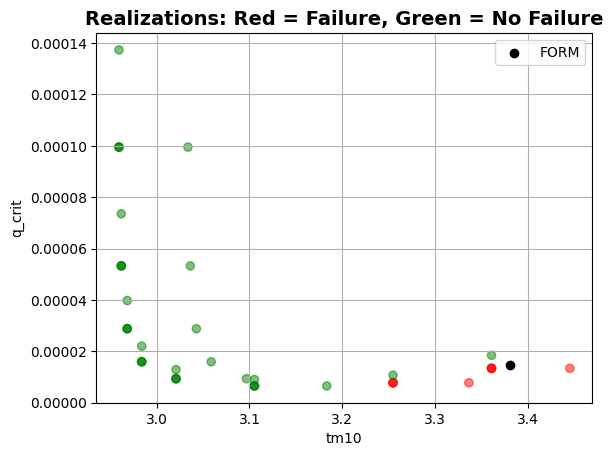

In [ ]:
project.settings.reliability_method = ReliabilityMethod.form
project.settings.relaxation_factor = 0.75
project.settings.maximum_iterations = 150
project.settings.epsilon_beta = 0.01
project.settings.save_realizations = True
project.settings.save_convergence = True

project.run()

project.design_point.print()
project.design_point.plot_alphas()
project.design_point.plot_convergence()
project.design_point.plot_realizations()


### Perform reliability calculations with Cobyla algorithm

We now conduct the reliability analysis using the `cobyla_reliability` method.

Reliability (Cobyla Reliability)
 Reliability index = 1.315
 Probability of failure = 0.09434
 Model runs = 201
Alpha values:
 h: alpha = 0.02234, x = 1.498
 hm0: alpha = -0.1624, x = 1.533
 tm10: alpha = -0.3441, x = 3.189
 wave_direction: alpha = 0, x = 0
 dike_normal: alpha = 0, x = 0
 y_crest: alpha = 0, x = 6
 q_crit: alpha = 0.9245, x = 7.312e-06



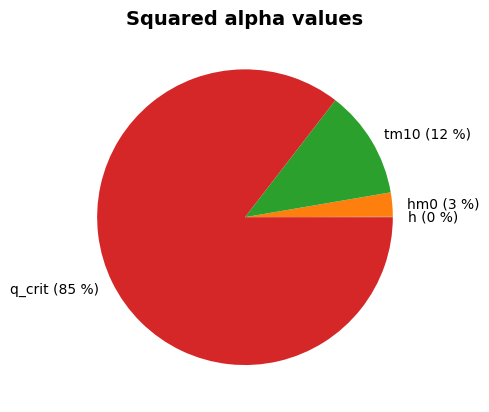

In [13]:
project.settings.reliability_method = ReliabilityMethod.cobyla_reliability
project.settings.maximum_iterations = 200
project.settings.epsilon_beta = 0.01

project.run()

project.design_point.print()
project.design_point.plot_alphas()